# TrOCR (Transformer OCR) Based Solution 

TrOCR truly surpass the previous techniques in terms of accuracy.

The TrOCR model is made up of two stages:

- The encoder stage consists of a pretrained vision transformer model.
- And the decoder stage consists of a pretrained language transformer model.

Due to their highly efficient pretraining, transformer-based models perform extremely well on downstream tasks. For this reason, the authors chose the DeIT as the vision transformer model. For the decoder stage, they chose the RoBERTa or the UniLM model, depending on the TrOCR variant.

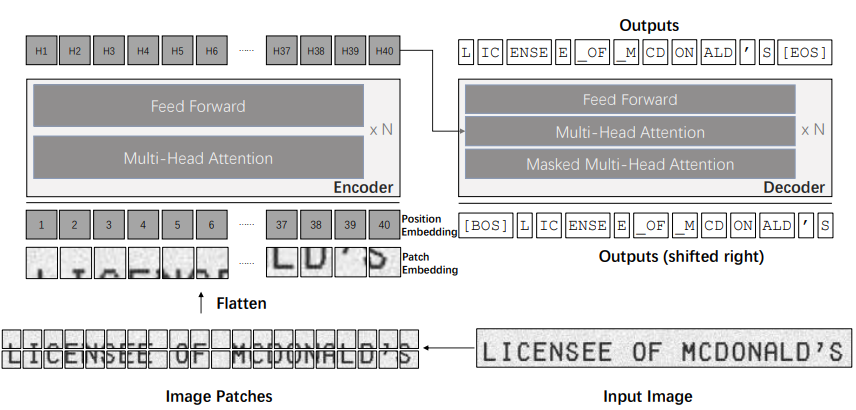

Just like the pretraining stage models, the handwritten and printed models also include three scales each:
## TrOCR Pretrained Models
#### The pretrained models in the TrOCR family are called stage 1 models. These models are trained on large scale synthetically generated data. The dataset includes hundreds of millions of images of printed text lines.

1. TrOCR-Small-Stage1
2. TrOCR-Base-Stage1
3. TrOCR-Large-Stage1

## TrOCR Fine-Tuned Models

#### Just like the pretraining stage models, the handwritten and printed models also include three scales each:

1. TrOCR-Small-IAM
2. TrOCR-Base-IAM
3. TrOCR-Large-IAM
4. TrOCR-Small-SROIE
5. TrOCR-Base-SROIE
6. TrOCR-Large-SROIE


##### Sidenote: Thre might be some directory root issue here as I was just trying out different approaches and we did not eneded up with this because of high training and texting time (~25 hours). Though this model is no doubt really good and should have given us high accuracy because it world well with all types of image data unlike traditional OCE methods but anyways :') (I wish I had a Nvidia GPU 😭)

Also I will share the optimal solution we used soon (within a week) :)

In [1]:
!pip install transformers
!pip install sentencepiece
!pip install jiwer
!pip install datasets
!pip install evaluate
!pip install -U accelerate

!pip install matplotlib
!pip install protobuf==3.20.1
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you 

# Our Approach
##### 1. Preparation: There is no need to prepare the dataset as it is not practical to draw bounding box around all the 2.5L images also that the images are well oriented and TrOCR works well with low resolution image too so No such preprocessing step required
##### 2. Load the TrOCR Small Printed model (Light Weight) from Hugging Face.
##### 3. Initialize the Hugging Face Sequence to Sequence Trainer API.
##### 4. Define the evaluation metric
##### 5. Train the model and run inference.

In [3]:
import os
image_folder_path = '/kaggle/input/amazon-final/train_images'
image_files = os.listdir(image_folder_path)
print(image_files[:5])

['516m7Eu6LNL.jpg', '81OUaAc42CS.jpg', '71D81Xct+vL.jpg', '81iRmDoi-mL.jpg', '61lyjKjb5xL.jpg']


In [5]:
import pandas as pd
import os

df = pd.read_csv('/kaggle/input/amazon-ml-challenge/student_resource 3/dataset/train.csv')
df['image_name'] = df['image_link'].apply(lambda x: x.split('/')[-1].split('.')[0])

image_folder_path = '/kaggle/input/amazon-final/train_images'

def get_image_path(image_name):
    image_file = f"{image_name}.jpg"
    image_path = os.path.join(image_folder_path, image_file)
    if os.path.exists(image_path):
        return image_path
    return None

# Fill missing values in the dataframe with an empty string in all columns
df = df.fillna('')

df['image_file'] = df['image_name'].apply(get_image_path)

df_filtered = df.dropna(subset=['image_file'])
final_df = df_filtered[['image_file', 'group_id', 'entity_name', 'entity_value']]

final_df.to_csv('/kaggle/working/final_dataset.csv', index=False)
pd.read_csv('/kaggle/working/final_dataset.csv')

,image_file,group_id,entity_name,entity_value
0,/kaggle/input/amazon-final/train_images/61I9Xd...,748919,item_weight,500.0 gram
1,/kaggle/input/amazon-final/train_images/71gSRb...,916768,item_volume,1.0 cup
2,/kaggle/input/amazon-final/train_images/61BZ4z...,459516,item_weight,0.709 gram
3,/kaggle/input/amazon-final/train_images/612mrl...,459516,item_weight,0.709 gram
4,/kaggle/input/amazon-final/train_images/617Tl4...,731432,item_weight,1400 milligram
...,...,...,...,...
3768,/kaggle/input/amazon-final/train_images/71Whgz...,529606,item_weight,256 gram
3769,/kaggle/input/amazon-final/train_images/71y4Bs...,529606,item_weight,9 ounce
3770,/kaggle/input/amazon-final/train_images/614gLU...,529606,item_weight,256 gram
3771,/kaggle/input/amazon-final/train_images/51IaRl...,281678,item_weight,43.2 gram


In [6]:
df2 = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')

first_value = df2.iloc[0, 0]

print(first_value)

/kaggle/input/amazon-final/train_images/61I9XdN6OFL.jpg


In [7]:
df = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')

first_value = df.iloc[0, 0]

print(first_value)

/kaggle/input/amazon-final/train_images/61I9XdN6OFL.jpg


In [9]:
#import pandas as pd

#df = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')
#old_segment = '/content/drive/MyDrive/student_resource/'
#new_segment = '/kaggle/input/amazon-final/'

#df['image_file'] = df['image_file'].str.replace(old_segment, new_segment)
#df.to_csv('/kaggle/working/updated_train_subset_dataset.csv', index=False)

#df

In [10]:
import os
import torch
import evaluate
import numpy as np
import pandas as pd
import glob as glob
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from PIL import Image
from tqdm.notebook import tqdm
from dataclasses import dataclass
from torch.utils.data import Dataset
from transformers import (
    VisionEncoderDecoderModel, 
    TrOCRProcessor,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    default_data_collator
)

block_plot = False
plt.rcParams['figure.figsize'] = (12, 9)

##### set the seed for reproducibility across different runs and define the computation device.

In [11]:
os.environ["TOKENIZERS_PARALLELISM"] = 'false'
def seed_everything(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

#### The forward pass will use GPU as kaggle provides handy Tesla T4 GPU with a weekly quota of 30hrs

In [12]:
import torch
print(torch.cuda.device_count())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


2


#### Before we get to the training part, let’s define the training, dataset, and model configurations.

In [13]:
@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:    int = 10
    EPOCHS:        int = 10
    LEARNING_RATE: float = 0.00005

@dataclass(frozen=True)
class DatasetConfig:
    DATA_ROOT:     str = '/kaggle/input/amazon-final/train_images'

@dataclass(frozen=True)
class ModelConfig:
    MODEL_NAME: str = 'microsoft/trocr-small-handwritten'

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')

def visualize_images_with_entity_value(df, num_images=9):
    """
    Visualizes a grid of images along with their entity_value.
    Parameters:
    df (DataFrame): DataFrame containing 'image_file' and 'entity_value' columns.
    num_images (int): Number of images to display.
    """
    df_sample = df.sample(min(num_images, len(df)))  
    plt.figure(figsize=(15, 15))
    
    num_columns = 3 
    for idx, row in enumerate(df_sample.itertuples()):
        img_path = row.image_file
        entity_value = row.entity_value
        img = Image.open(img_path)

        plt.subplot((num_images // num_columns) + 1, num_columns, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Entity: {entity_value}", fontsize=12)

    plt.tight_layout()
    plt.show()

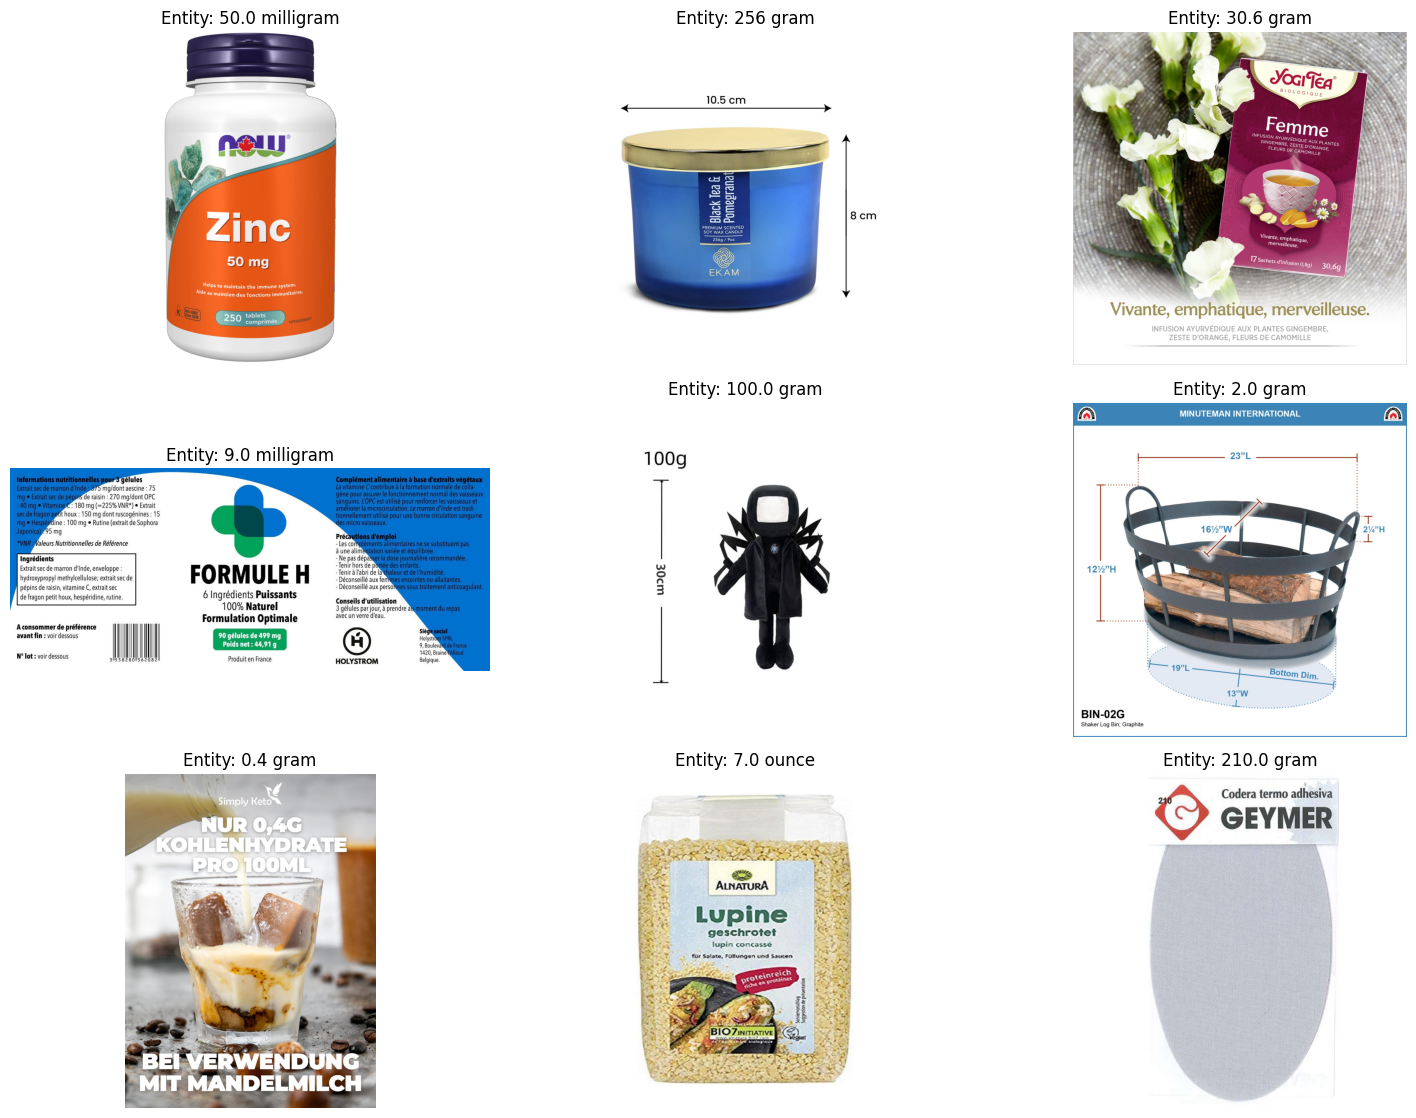

In [15]:
# Visualize a grid of images with entity_value
visualize_images_with_entity_value(df, num_images=9)

In [17]:
df = df.fillna('')

In [18]:
null_counts = df.isna().sum()
empty_string_counts = (df == '').sum()

total_empty_or_null_counts = null_counts + empty_string_counts
print(total_empty_or_null_counts)

image_file      0
group_id        0
entity_name     0
entity_value    0
dtype: int64


In [20]:
import pandas as pd

df = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')
train_df = df[['entity_value','entity_name', 'image_file']]
train_df.to_csv('train_df.csv', index=False)

train_df = train_df.fillna('')

train_df.head()

,entity_value,entity_name,image_file
0,500.0 gram,item_weight,/kaggle/input/amazon-final/train_images/61I9Xd...
1,1.0 cup,item_volume,/kaggle/input/amazon-final/train_images/71gSRb...
2,0.709 gram,item_weight,/kaggle/input/amazon-final/train_images/61BZ4z...
3,0.709 gram,item_weight,/kaggle/input/amazon-final/train_images/612mrl...
4,1400 milligram,item_weight,/kaggle/input/amazon-final/train_images/617Tl4...


In [21]:
null_counts = train_df.isna().sum()
empty_string_counts = (train_df == '').sum()

total_empty_or_null_counts = null_counts + empty_string_counts
print(total_empty_or_null_counts)

entity_value    0
entity_name     0
image_file      0
dtype: int64


# Augmentations
### We apply ColorJitter and GaussianBlur to the images. There is no need to apply any rotation of flipping to the images as there is already enough variability in the original dataset.

In [23]:
# Augmentations.
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 5)),
])

# Data Preparation
#### A highly effective method for preparing the dataset is by creating a custom dataset class. This approach provides more granular control over the input data. The code snippet below defines a `CustomOCRDataset` class for dataset preparation.

##### The `__getitem__()` method begins by loading the label and image from disk. It then applies augmentations to the image using the defined transforms. The `TrOCRProcessor` processes the image, returning normalized pixel values in the form of a PyTorch tensor. The text labels are tokenized next. Labels shorter than 128 characters are padded with `-100` to reach a length of 128, while labels exceeding this length are truncated. Finally, the method returns the pixel values and labels in a dictionary format.

In [24]:
class CustomOCRDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

        self.df['entity_value'] = self.df['entity_value'].fillna('')

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # The image file name.
        file_name = self.df['image_file'][idx]
        # The text (label).
        text = self.df['entity_value'][idx]

        # Read the image, apply augmentations, and get the transformed pixels.
        image = Image.open(file_name).convert('RGB')
        image = train_transforms(image)
        pixel_values = self.processor(image, return_tensors='pt').pixel_values
        # Pass the text through the tokenizer and get the labels,
        # i.e. tokenized labels.
        labels = self.processor.tokenizer(
            text,
            padding='max_length',
            max_length=self.max_target_length
        ).input_ids
        # We are using -100 as the padding token.
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]
        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [25]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the DataFrame
train_df = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')

train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)

# Create the dataset instance with the correct column names
train_dataset = CustomOCRDataset(
    root_dir='/kaggle/input/amazon-final/train_images/',
    df=train_df,
    processor=processor
)

valid_dataset = CustomOCRDataset(
    root_dir='/kaggle/input/amazon-final/train_images',
    df=valid_df,
    processor=processor
)


encoding = train_dataset[0]
for k,v in encoding.items():
    print(k, v.shape)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


(-0.5, 1499.5, 999.5, -0.5)

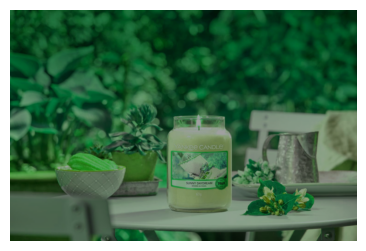

In [26]:
image = Image.open(train_df['image_file'][0]).convert("RGB")
image = train_transforms(image)
plt.figure(figsize=(5, 3))
plt.imshow(image)
plt.axis('off')

In [27]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

623 gram


# Prepare the TrOCR Small Printed Model
The `VisionEncoderDecoderModel` class gives us access to all the TrOCR models. The from_pretrained() method accepts the repository name to load a pretrained model

The model contains 61.5 million parameters. Fine tuning will be done to all the parameters so they can be trained.

In [28]:
model = VisionEncoderDecoderModel.from_pretrained(ModelConfig.MODEL_NAME)
model.to(device)
print(model)
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")


config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(

In [29]:
# Set special tokens used for creating the decoder_input_ids from the labels.
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# Set Correct vocab size.
model.config.vocab_size = model.config.decoder.vocab_size
model.config.eos_token_id = processor.tokenizer.sep_token_id

model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

# Optimizer and Evaluation Metric
#### For optimizing the model weights, we choose the AdamW optimizer with a weight decay of 0.0005.

In [30]:
optimizer = optim.AdamW(
    model.parameters(), lr=TrainingConfig.LEARNING_RATE, weight_decay=0.0005
)

#### The evaluation metric is going to be CER (Character Error Rate).

In [31]:
cer_metric = evaluate.load('cer')
def compute_cer(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

# Training

#### The FP16 training is being used as it uses less GPU memory and also allows us to use a higher batch size. Also, the logging and model-saving strategy is based on epochs. All the reports will be logged to tensorboard.

#### These training arguments will be passed to the trainer API along with the other required arguments.

In [33]:
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy='epoch',
    per_device_train_batch_size=TrainingConfig.BATCH_SIZE,
    per_device_eval_batch_size=TrainingConfig.BATCH_SIZE,
    fp16=True,
    output_dir='trocr_amazon/',
    logging_strategy='epoch',
    save_strategy='epoch',
    save_total_limit=2,
    report_to='tensorboard',
    num_train_epochs=TrainingConfig.EPOCHS,
    dataloader_num_workers=8 # Set workers to 0 to disable parallel data loading
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [34]:
# Initialize trainer.
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_cer,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=default_data_collator
)

/opt/conda/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:137: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [35]:
import torch
print(torch.cuda.device_count())  # Should return 2 if both GPUs are available

2


In [ ]:
res = trainer.train()

### I did not train the model after 2 epochs so you guys wont be able to see any output here. Reason? Checkout my first markdown

In [ ]:
processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)
trained_model = VisionEncoderDecoderModel.from_pretrained('seq2seq_model_printed/checkpoint-'+str(res.global_step)).to(device)

def read_and_show(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

def ocr(image, processor, model):
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text
def eval_new_data(data_path=os.path.join(DatasetConfig.DATA_ROOT, 'scut_test', '*'), num_samples=50):
    image_paths = glob.glob(data_path)
    for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
        if i == num_samples:
            break
        image = read_and_show(image_path)
        text = ocr(image, processor, trained_model)
        plt.figure(figsize=(7, 4))
        plt.imshow(image)
        plt.title(text)
        plt.axis('off')
        plt.show()
        
    eval_new_data(
    data_path=os.path.join(DatasetConfig.DATA_ROOT, 'scut_test', '*'),
    num_samples=100
    )
 